<a href="https://colab.research.google.com/github/Sakamotto/MPCA/blob/main/ANN/Exerc%C3%ADcio_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install idx2numpy

In [2]:
import idx2numpy
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
train_images = idx2numpy.convert_from_file("train-images.idx3-ubyte")
train_labels = idx2numpy.convert_from_file("train-labels.idx1-ubyte")
test_images = idx2numpy.convert_from_file("t10k-images.idx3-ubyte")
test_labels = idx2numpy.convert_from_file("t10k-labels.idx1-ubyte")

In [4]:
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)

Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


In [5]:
# primeiro adiciona uma nova dimensão na posição 1 usando unsqueeze e depois normaliza
# dividindo por 255
train_images = torch.tensor(train_images, dtype=torch.float32).unsqueeze(1) / 255.0
test_images = torch.tensor(test_images, dtype=torch.float32).unsqueeze(1) / 255.0
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_labels = torch.tensor(test_labels, dtype=torch.long)

train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Shape train_images: torch.Size([60000, 1, 28, 28])
Shape train_labels: torch.Size([60000])
Shape test_images: torch.Size([10000, 1, 28, 28])
Shape test_labels: torch.Size([10000])


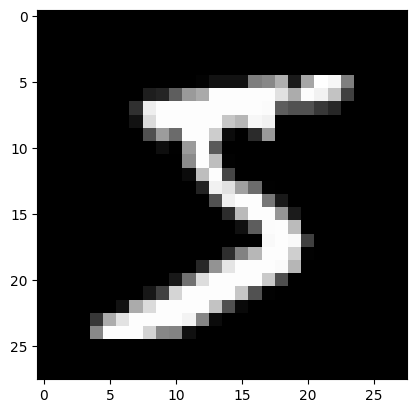

In [6]:
print("Shape train_images:", train_images.shape)
print("Shape train_labels:", train_labels.shape)
print("Shape test_images:", test_images.shape)
print("Shape test_labels:", test_labels.shape)

plt.imshow(train_images[0][0], cmap='gray')
plt.show()

In [7]:
# primeiro só uma cnn simples
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 28x28 -> 14x14
        x = self.pool(F.relu(self.conv2(x)))  # 14x14 -> 7x7
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [8]:
# treinamento
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(5):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Época {epoch+1} concluída.")

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Acurácia no teste: {100 * correct / total:.2f}%")

Época 1 concluída.
Época 2 concluída.
Época 3 concluída.
Época 4 concluída.
Época 5 concluída.
Acurácia no teste: 99.11%


In [9]:
# treinamento usando uma learning rate menor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

for epoch in range(5):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Época {epoch+1} concluída.")

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Acurácia no teste: {100 * correct / total:.2f}%")

Época 1 concluída.
Época 2 concluída.
Época 3 concluída.
Época 4 concluída.
Época 5 concluída.
Acurácia no teste: 97.95%


In [11]:
# treinamento usando uma learning rate menor e mais épocas
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

for epoch in range(100):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Época {epoch+1} concluída.")

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Acurácia no teste: {100 * correct / total:.2f}%")

Época 1 concluída.
Época 2 concluída.
Época 3 concluída.
Época 4 concluída.
Época 5 concluída.
Época 6 concluída.
Época 7 concluída.
Época 8 concluída.
Época 9 concluída.
Época 10 concluída.
Época 11 concluída.
Época 12 concluída.
Época 13 concluída.
Época 14 concluída.
Época 15 concluída.
Época 16 concluída.
Época 17 concluída.
Época 18 concluída.
Época 19 concluída.
Época 20 concluída.
Época 21 concluída.
Época 22 concluída.
Época 23 concluída.
Época 24 concluída.
Época 25 concluída.
Época 26 concluída.
Época 27 concluída.
Época 28 concluída.
Época 29 concluída.
Época 30 concluída.
Época 31 concluída.
Época 32 concluída.
Época 33 concluída.
Época 34 concluída.
Época 35 concluída.
Época 36 concluída.
Época 37 concluída.
Época 38 concluída.
Época 39 concluída.
Época 40 concluída.
Época 41 concluída.
Época 42 concluída.
Época 43 concluída.
Época 44 concluída.
Época 45 concluída.
Época 46 concluída.
Época 47 concluída.
Época 48 concluída.
Época 49 concluída.
Época 50 concluída.
Época 51 